<a href="https://colab.research.google.com/github/worldstar0722/IS_4487_25FA/blob/main/assignment_4_data_understanding_ChoiEllie.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# IS4487 Week 4 - Assignment

### Outline

Our Goals with this Project:

1. Import and review the data
2. Perform EDA and Clean Data

<a href="https://colab.research.google.com/github/Stan-Pugsley/is_4487_base/blob/main/Assignments/assignment_4_data_understanding.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### AdviseInvest Data Dictionary

| Variable | Description | Type | Code |
|:---|:---|:---|:---|
| Answered | Customer response | Binary | 0: customer did not answer scheduled call; 1: customer answered scheduled call |
| Income | Customer income in US dollars | Numeric | |
| Female | Customer gender | Binary | 0: female; 1: male |
| Age | Age in years | Numeric | |
| Job | Nature of job | Categorical | 0 : unemployed; 1 : entry level position; 2 : midlevel position; 3 : management/ self-employed/ highly qualified employee/ officer |
| Num_dependents | Number of people for whom the customer provides maintenance | Numeric | |
| Rent | Customer rents | Binary | 0: no; 1: yes |
| Own_res | Customer owns residence | Binary | 0: no; 1: yes |
| New_car | Recent new car purchase | Binary | New car purchase in the last 3 months: 0: no, 1: yes |
| Chk_acct | Checking account status | Categorical | 0 : no checking account; 1: checking < 200 USD; 2 : 200 < checking < 2000 USD; 3: 2000 < checking < 35000 USD; 4: >= 3500 USD |
| Sav_acct | Average balance in savings account | Categorical | 0 : no savings account; 1 : 100 <= savings < 500 USD; 2 : 500 <= savings < 2000 USD; 3 : 2000 < savings < 35000 USD; 4: >= 3500 USD |
| Num_accts | Number of accounts owned by customer | Numeric | |
| Mobile | Mobile phone | Binary | 0: customer provided non‐mobile phone for follow‐up call; 1: customer provided mobile phone for follow‐up call |
| Product | Type of product purchased after conversation with sales rep | Categorical | 0: customer did not answer call; 1: customer answered but did not purchase a product; 2: customer answered and purchased Beginner plan; 3: customer answered and purchased Intermediate plan; 4: customer answered and purchased Advanced plan |


### Load Libraries

Import the libraries you will need, such as:
- Pandas
- Sklearn
- Matplotlib


In [7]:
#Import libraries 🔧
import pandas as pd
import sklearn
import matplotlib.pyplot as plt

## Step 1: Initial Data Understanding

 - Import data from the AdviseInvest historical dataset into a dataframe (in GitHub go to Assignments > DataSets)
 - Describe or profile the dataframe
 - Look for any outliers, missing values, or duplicates

In [8]:
#Import the data 🔧
url="https://raw.githubusercontent.com/Stan-Pugsley/is_4487_base/5f8fd2ba3629f320b7d128f2d917a8385c8cc0b3/DataSets/adviseinvest_historical_data.csv"
df = pd.read_csv(url)

In [9]:
#View the datatypes 🔧
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29504 entries, 0 to 29503
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   answered        29504 non-null  int64  
 1   income          29504 non-null  int64  
 2   female          29504 non-null  object 
 3   age             29504 non-null  int64  
 4   job             29504 non-null  int64  
 5   num_dependents  29504 non-null  int64  
 6   rent            29504 non-null  int64  
 7   own_res         29504 non-null  int64  
 8   new_car         29502 non-null  float64
 9   chk_acct        29504 non-null  int64  
 10  sav_acct        29504 non-null  int64  
 11  num_accts       29504 non-null  int64  
 12  mobile          29504 non-null  int64  
 13  product         29504 non-null  int64  
dtypes: float64(1), int64(12), object(1)
memory usage: 3.2+ MB


In [10]:
#Describe the data 🔧
df.describe(include="all")
print("Missing values per column:\n", df.isnull().sum())
print("\nNumber of duplicates:", df.duplicated().sum())

Missing values per column:
 answered          0
income            0
female            0
age               0
job               0
num_dependents    0
rent              0
own_res           0
new_car           2
chk_acct          0
sav_acct          0
num_accts         0
mobile            0
product           0
dtype: int64

Number of duplicates: 29035


# Step 2: Exploratory Data Analysis (EDA)
- Explore the relationships between the target and independent variables
- Create at least five charts to show the relationships, using different chart types that are approriate to the analysis
- Ensure that all charts are clearly labeled and formatted

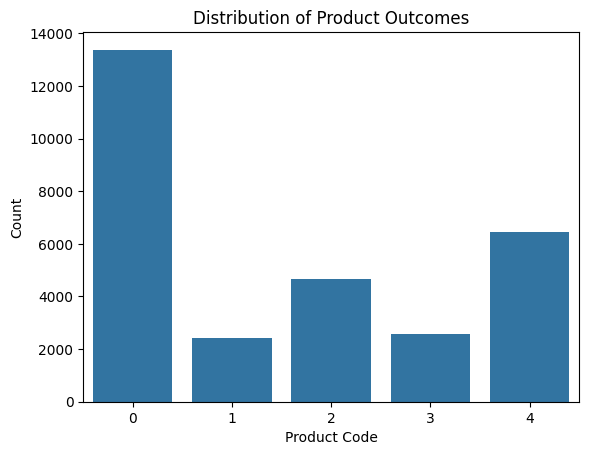

In [12]:
# Chart 1 🔧
sns.countplot(x="Product", data=df)
plt.title("Distribution of Product Outcomes")
plt.xlabel("Product Code")
plt.ylabel("Count")
plt.show()

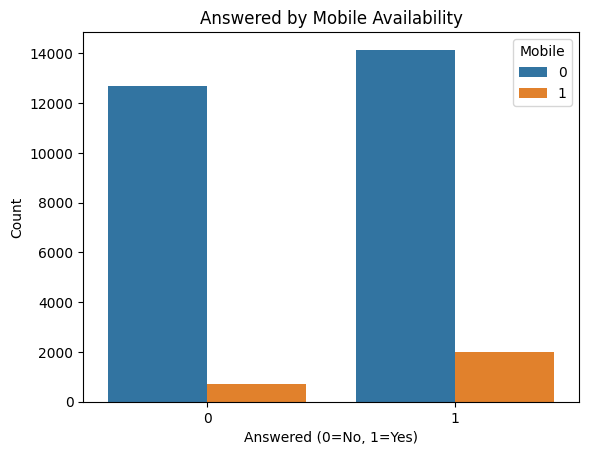

In [15]:
# Chart 2 🔧
sns.countplot(x="answered", hue="mobile", data=df)
plt.title("Answered by Mobile Availability")
plt.xlabel("Answered (0=No, 1=Yes)")
plt.ylabel("Count")
plt.legend(title="Mobile")
plt.show()

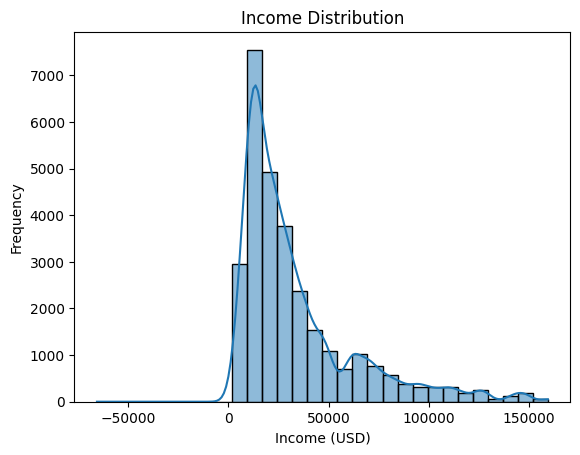

In [16]:
# Chart 3 🔧
sns.histplot(df["income"], bins=30, kde=True)
plt.title("Income Distribution")
plt.xlabel("Income (USD)")
plt.ylabel("Frequency")
plt.show()

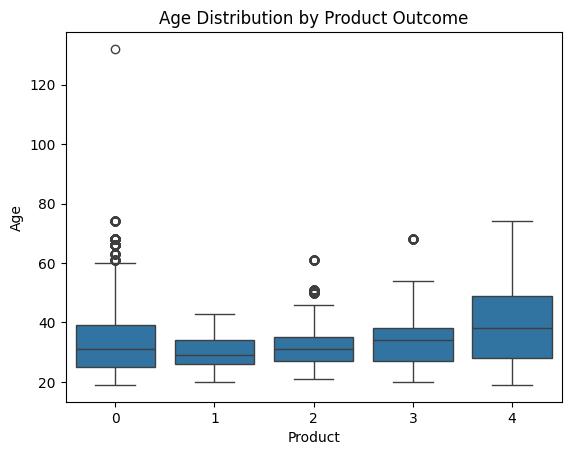

In [19]:
# Chart 4 🔧
sns.boxplot(x="product", y="age", data=df)
plt.title("Age Distribution by Product Outcome")
plt.xlabel("Product")
plt.ylabel("Age")
plt.show()

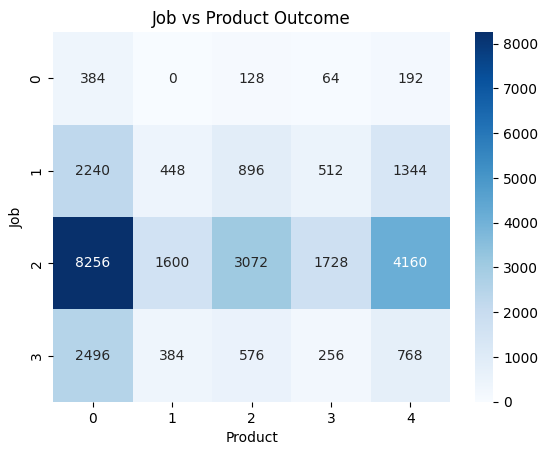

In [22]:
# Chart 5
job_product = pd.crosstab(df["job"], df["product"])
sns.heatmap(job_product, annot=True, fmt="d", cmap="Blues")
plt.title("Job vs Product Outcome")
plt.xlabel("Product")
plt.ylabel("Job")
plt.show()

# Step 3: Summarize Your Findings
### 3.1: Are all of the variables useful and applicable to the business need?  (you should reference the target variable and whether other variables have are likely to be correlated with the target)
The target variable is Product.  
Answered, Income, Job, Age, Account-Related Variables (Chk_accct, Sav_accct, Num_acccts) are associated with purchases.  
Rent, Own_res, and New_car may be less affected.

### 3.2: In what ways could the dataset be improved?  Are there any data quality issues or data types that should be fixed?

Some variables are numbers, but it is categorical code, so it is recommended to switch to category.  
Outliers may be seen in Income, Age.  
Missing values need to be supplemented.  
It is clearer to change the variable name Female to Gender.

## Submission Instructions

✅ **Before submitting:**
- Make sure all code cells are run and outputs are visible  
- All markdown questions are answered thoughtfully  
- Submit the assignment as an **HTML file** on Canvas

In [ ]:
!jupyter nbconvert --to html "assignment_04_LastnameFirstname.ipynb"